# Processing Alpha Dataset Construction
The original Yabb forum was downloaded with the following wget command. 
```
wget --recursive --no-clobber --page-requisites --html-extension --convert-links --restrict-file-names=windows --domains forum.processing.org --no-parent https://forum.processing.org/alpha/
```

## Dataset construction

In [32]:
import os
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dir_path = "./alpha-forum/forum.processing.org/alpha"

In [2]:
data = []
html_paths = []
for file_name in os.listdir(dir_path):
    if file_name.endswith('.html'):
        file_path = os.path.join(dir_path, file_name)
        html_paths.append(file_path)
        
print(f"The number of html paths {len(html_paths)}")


The number of html paths 3185


In [3]:
# Example strings: Aug 13th, 2002, 4:16pm »
def parse_date(date_string):
    date_string = date_string.rstrip('»').strip()

    # Remove the 'rd' from '3rd'
    date_string = date_string.replace('rd', '').replace('th', '').replace('st', '').replace('nd', '')

    # Parse the string into a datetime object
    return datetime.strptime(date_string, "%b %d, %Y, %I:%M%p")

In [4]:
example_fn = dir_path + '/board_BugFixes_action_display_num_1031267026.html'

In [35]:
max_urls = 10 

columns = ['Author'] + [f'URL{i+1}' for i in range(max_urls)]

def parse_file(file_path):
    # common encodings: 'utf-8', 'iso-8859-1', 'cp1252', and 'latin1'.
    with open(file_path, 'r', encoding='latin1') as f:
        contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')

    results = []

    title = soup.find('title').text
    title = title.replace("Processing 1.0 _ALPHA_ - ", "")

    for table in soup.find_all('table', {'class': ['windowbg', 'windowbg2']}):
        author = table.find('b').text

        date_tag = table.find('td', align='left')
        lines = date_tag.text.split('\n')
        for line in lines:
            if "on:" in line:
                # Extracting date after 'on:'
                date = line.split('on:')[1].strip()
                
        left_side = table.find('td', {'class': ['windowbg', 'windowbg2'], 'width': '20%'})

        tags = left_side.find_all('a')
        links = []
        for tag in tags:
            links.append(tag.get('href'))

        urls = [tag.get('href') for tag in tags]
        urls.extend([np.nan] * (max_urls - len(urls)))
    
        # Combine author name and urls, and append them to the data list
        row = [author] + urls
        results.append(row)
    return results
    

In [36]:
# Test on one file
parse_file(example_fn)

[['ik0',
  'board_BugFixes_action_icqpager_UIN_20288568.html',
  'http://wwp.icq.com/scripts/search.dll?to=20288568',
  'http://prac.net',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['fdb',
  'aim:goim?screenname=illililli@mac.com&message=Hi.+Are+you+there?',
  'http://www.grafitron.com/',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['REAS', 'http://reas.com', nan, nan, nan, nan, nan, nan, nan, nan, nan],
 ['ik0',
  'board_BugFixes_action_icqpager_UIN_20288568.html',
  'http://wwp.icq.com/scripts/search.dll?to=20288568',
  'http://prac.net',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['fry',
  'http://acg.media.mit.edu/people/fry/',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['ik0',
  'board_BugFixes_action_icqpager_UIN_20288568.html',
  'http://wwp.icq.com/scripts/search.dll?to=20288568',
  'http://prac.net',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['jes',
  'http://www.jigglingwhisker.com',
  nan,
  nan,
  nan,
  nan,
  n

In [37]:
# Add the results to a pandas object
#all_results = [parse_file(html_path) for html_path in html_paths[:10]]
#all_results = [result for html_path in html_paths for result in parse_file(html_path)]
all_results = []

for html_path in html_paths:
    try:
        all_results.extend(parse_file(html_path))
    except Exception as e:
        print(f"Error parsing {html_path}: {e}")

In [38]:
len(all_results)

11927

In [43]:
df = pd.DataFrame(all_results, columns=columns)
df = df.drop_duplicates(subset='Author')
df.to_csv('alpha-forum-users.csv', index=False)

In [44]:
df

,Author,URL1,URL2,URL3,URL4,URL5,URL6,URL7,URL8,URL9,URL10
0,ik0,board_BugFixes_action_icqpager_UIN_20288568.html,http://wwp.icq.com/scripts/search.dll?to=20288568,http://prac.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fdb,aim:goim?screenname=illililli@mac.com&message=...,http://www.grafitron.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,REAS,http://reas.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fry,http://acg.media.mit.edu/people/fry/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,jes,http://www.jigglingwhisker.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11786,drZool (unregged),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11834,Guido von Marientreu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11852,Peroki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11854,r1zm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.to_csv("processing-users.csv", escapechar="\\")

In [93]:
# How many posts were there
len(df)

11922

In [102]:
first_entry = df.sort_values('date').iloc[0]
last_entry = df.sort_values('date').iloc[-1]
print("First post date " + str(first_entry["date"]))
print("Last post date " + str(last_entry["date"]))

First post date 2002-08-02 15:29:00
Last post date 2005-04-19 09:55:00


### Author analysis

In [88]:
author_counts = df['author'].value_counts()

In [89]:
author_counts

author
fry         1371
arielm       562
benelek      560
REAS         510
Martin       412
            ... 
ppolotti       1
mattc          1
retry          1
stof           1
noshi          1
Name: count, Length: 1039, dtype: int64

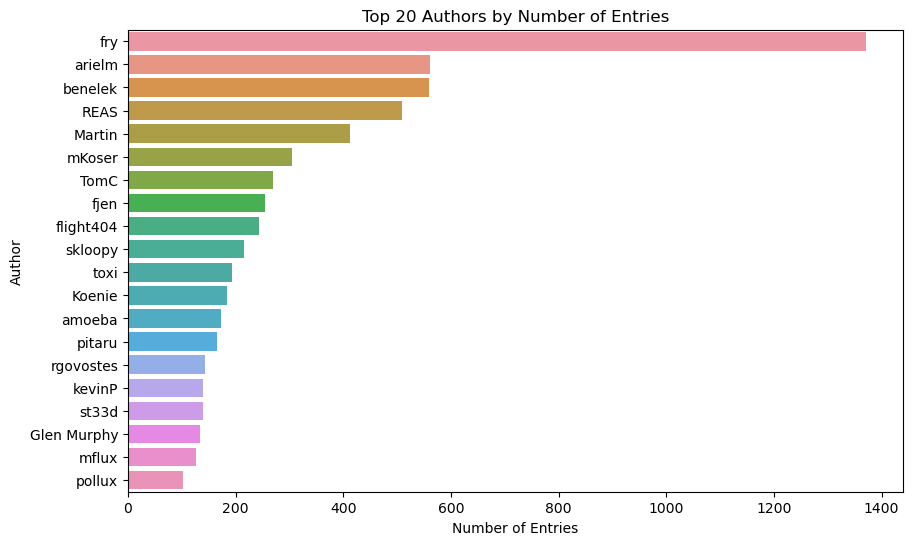

In [108]:
# Take the top 10 authors
top_10_authors = author_counts[:20]

# Plot the counts
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_authors.values, y=top_10_authors.index)
plt.xlabel('Number of Entries')
plt.ylabel('Author')
plt.title('Top 20 Authors by Number of Entries')
plt.show()

In [114]:
author_counts.describe()

count    1039.000000
mean       11.474495
std        58.332076
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1371.000000
Name: count, dtype: float64

### Post frequency

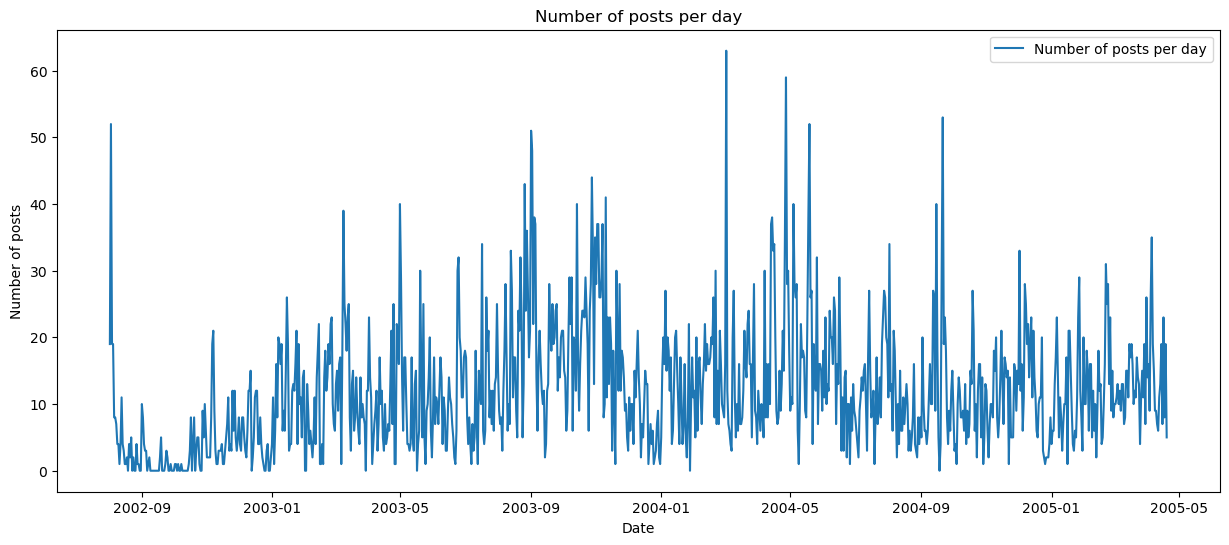

In [159]:
# Ensure 'date' is of datetime type
#df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index (this makes plotting easier)
#df.set_index('date', inplace=True)

# Resample 'author' by day and count the number of posts
daily_counts = df.resample('D')['content'].count()

# Plot the daily counts
plt.figure(figsize=(15,6))
plt.plot(daily_counts, label='Number of posts per day')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.title('Number of posts per day')
plt.legend()
plt.show()

In [158]:
daily_counts = df.resample('D')['content'].count()
daily_counts

date
2002-08-02    19
2002-08-03    52
2002-08-04    19
2002-08-05    19
2002-08-06     8
              ..
2005-04-15     7
2005-04-16    23
2005-04-17     8
2005-04-18    19
2005-04-19     5
Freq: D, Name: content, Length: 992, dtype: int64

In [130]:
# Get the git data as well
gitdf = pd.read_csv("processing-commits-flat.csv")

In [131]:
len(gitdf)

15400

In [132]:
gitdf

,Unnamed: 0,sha,node_id,url,html_url,comments_url,parents,repo_name,owner,commit.author.name,...,committer.starred_url,committer.subscriptions_url,committer.organizations_url,committer.repos_url,committer.events_url,committer.received_events_url,committer.type,committer.site_admin,author,committer
0,0,80a5b124f1aa4e08e4d23d1eac97a5b1feb5211a,C_kwDODK2UidoAKDgwYTViMTI0ZjFhYTRlMDhlNGQyM2Qx...,https://api.github.com/repos/processing/proces...,https://github.com/processing/processing4/comm...,https://api.github.com/repos/processing/proces...,[{'sha': '14e070213dac3d028fbf7e71a7514e6d1560...,processing4,processing,Ben Fry,...,https://api.github.com/users/benfry/starred{/o...,https://api.github.com/users/benfry/subscriptions,https://api.github.com/users/benfry/orgs,https://api.github.com/users/benfry/repos,https://api.github.com/users/benfry/events{/pr...,https://api.github.com/users/benfry/received_e...,User,False,NaN,NaN
1,1,14e070213dac3d028fbf7e71a7514e6d1560bc16,C_kwDODK2UidoAKDE0ZTA3MDIxM2RhYzNkMDI4ZmJmN2U3...,https://api.github.com/repos/processing/proces...,https://github.com/processing/processing4/comm...,https://api.github.com/repos/processing/proces...,[{'sha': 'ae809133cdeb8566c5b4d252eafd9e8e7181...,processing4,processing,Ben Fry,...,https://api.github.com/users/web-flow/starred{...,https://api.github.com/users/web-flow/subscrip...,https://api.github.com/users/web-flow/orgs,https://api.github.com/users/web-flow/repos,https://api.github.com/users/web-flow/events{/...,https://api.github.com/users/web-flow/received...,User,False,NaN,NaN
2,2,d8a163b9a774bba6581c87a4f39422a30d56048c,C_kwDODK2UidoAKGQ4YTE2M2I5YTc3NGJiYTY1ODFjODdh...,https://api.github.com/repos/processing/proces...,https://github.com/processing/processing4/comm...,https://api.github.com/repos/processing/proces...,[{'sha': '99dc03de28d04bdd3213a0679cf0f8ef5912...,processing4,processing,M. Avontuur,...,https://api.github.com/users/Efratror/starred{...,https://api.github.com/users/Efratror/subscrip...,https://api.github.com/users/Efratror/orgs,https://api.github.com/users/Efratror/repos,https://api.github.com/users/Efratror/events{/...,https://api.github.com/users/Efratror/received...,User,False,NaN,NaN
3,3,99dc03de28d04bdd3213a0679cf0f8ef59123aa9,C_kwDODK2UidoAKDk5ZGMwM2RlMjhkMDRiZGQzMjEzYTA2...,https://api.github.com/repos/processing/proces...,https://github.com/processing/processing4/comm...,https://api.github.com/repos/processing/proces...,[{'sha': '2ff786a0bd51e254d4ed58a384e4856648e4...,processing4,processing,M. Avontuur,...,https://api.github.com/users/Efratror/starred{...,https://api.github.com/users/Efratror/subscrip...,https://api.github.com/users/Efratror/orgs,https://api.github.com/users/Efratror/repos,https://api.github.com/users/Efratror/events{/...,https://api.github.com/users/Efratror/received...,User,False,NaN,NaN
4,4,2ff786a0bd51e254d4ed58a384e4856648e4c210,C_kwDODK2UidoAKDJmZjc4NmEwYmQ1MWUyNTRkNGVkNThh...,https://api.github.com/repos/processing/proces...,https://github.com/processing/processing4/comm...,https://api.github.com/repos/processing/proces...,[{'sha': 'a2b5b973e163964ccb6d96aa1d7c2e0bcb77...,processing4,processing,M. Avontuur,...,https://api.github.com/users/Efratror/starred{...,https://api.github.com/users/Efratror/subscrip...,https://api.github.com/users/Efratror/orgs,https://api.github.com/users/Efratror/repos,https://api.github.com/users/Efratror/events{/...,https://api.github.com/users/Efratror/received...,User,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,15395,98b536fd49827d1b66e9fae04fb227b228cb1637,MDY6Q29tbWl0MjEyNzAyMzQ1Ojk4YjUzNmZkNDk4MjdkMW...,https://api.github.com/repos/processing/proces...,https://github.com/processing/processing4/comm...,https://api.github.com/repos/processing/proces...,[{'sha': '6ba11dba3ae92ffec5da7dbd9faa7ca9f5e6...,processing4,processing,benfry,...,https://api.github.com/users/benfry/starred{/o...,https://api.github.com/users/benfry/su

In [138]:
# Find the columns
git_first_entry = gitdf.sort_values('commit.committer.date').iloc[0]
git_last_entry = gitdf.sort_values('commit.committer.date').iloc[-1]
print("First post date " + str(git_first_entry["commit.committer.date"]))
print("Last post date " + str(git_last_entry["commit.committer.date"]))

First post date 2001-07-26T17:09:40Z
Last post date 2023-02-27T11:01:21Z


In [ ]:
gitdf.columns

In [167]:
# Convert the 'commit.committer.date' column to datetime
gitdf['commit.committer.date'] = pd.to_datetime(gitdf['commit.committer.date'])

start_date = '2002-08-02' # same as alpha forum
end_date = '2005-04-19' # same as alpha forum

# Use boolean indexing to filter the dates
mask = (gitdf['commit.committer.date'] >= start_date) & (gitdf['commit.committer.date'] <= end_date)
filtered_df = gitdf.loc[mask]

In [144]:
len(filtered_df) # vs 12000 forum posts

966

### Author analysis

In [147]:
git_author_counts = gitdf['commit.author.name'].value_counts()

In [148]:
git_author_counts # during all the time

commit.author.name
Ben Fry              5252
benfry               4299
codeanticode         2119
Manindra Moharana     575
Jakub Valtar          497
                     ... 
kiwistrongis            1
J David Eisenberg       1
Jordan Orelli           1
Barış Çiftçi            1
jordirosa               1
Name: count, Length: 185, dtype: int64

In [149]:
git_author_counts = filtered_df['commit.author.name'].value_counts()

In [150]:
git_author_counts

commit.author.name
benfry             887
Casey Reas          35
dmose               35
juniperoserra        5
rocha                3
postspectacular      1
Name: count, dtype: int64

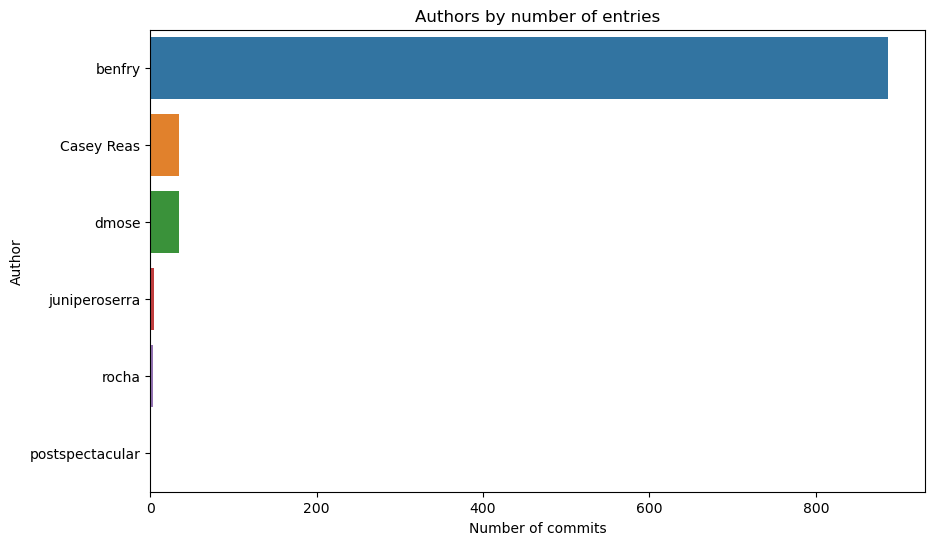

In [153]:
# Take the top 10 authors
git_top_10_authors = git_author_counts

# Plot the counts
plt.figure(figsize=(10,6))
sns.barplot(x=git_top_10_authors.values, y=git_top_10_authors.index)
plt.xlabel('Number of commits')
plt.ylabel('Author')
plt.title('Authors by number of entries')
plt.show()

In [154]:
git_top_10_authors.describe()

count      6.000000
mean     161.000000
std      356.013483
min        1.000000
25%        3.500000
50%       20.000000
75%       35.000000
max      887.000000
Name: count, dtype: float64

### Post frequency

In [164]:
filtered_df.columns

Index(['Unnamed: 0', 'sha', 'node_id', 'url', 'html_url', 'comments_url',
       'parents', 'repo_name', 'owner', 'commit.author.name',
       'commit.author.email', 'commit.author.date', 'commit.committer.name',
       'commit.committer.email', 'commit.message', 'commit.tree.sha',
       'commit.tree.url', 'commit.url', 'commit.comment_count',
       'commit.verification.verified', 'commit.verification.reason',
       'commit.verification.signature', 'commit.verification.payload',
       'author.login', 'author.id', 'author.node_id', 'author.avatar_url',
       'author.gravatar_id', 'author.url', 'author.html_url',
       'author.followers_url', 'author.following_url', 'author.gists_url',
       'author.starred_url', 'author.subscriptions_url',
       'author.organizations_url', 'author.repos_url', 'author.events_url',
       'author.received_events_url', 'author.type', 'author.site_admin',
       'committer.login', 'committer.id', 'committer.node_id',
       'committer.avatar_url', '

/tmp/ipykernel_494/3141672903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['commit.committer.date'])


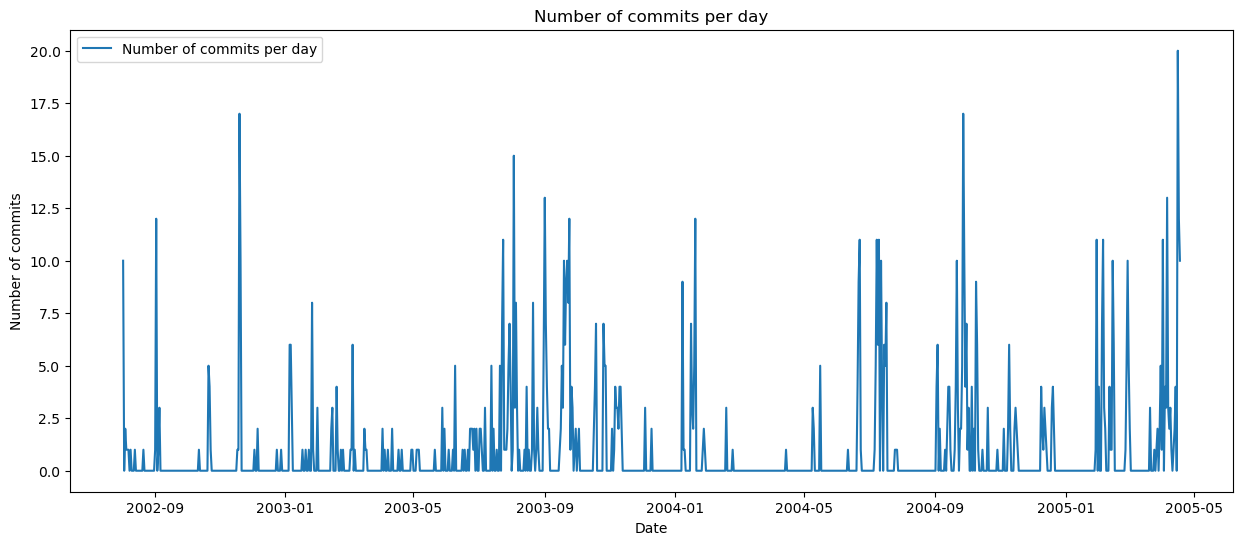

In [174]:
# Ensure 'date' is of datetime type
filtered_df['date'] = pd.to_datetime(filtered_df['commit.committer.date'])

# Set 'date' as the index (this makes plotting easier)
filtered_df.set_index('date', inplace=True)

# Resample 'author' by day and count the number of posts
git_daily_counts = filtered_df.resample('D')['commit.message'].count()

# Plot the daily counts
plt.figure(figsize=(15,6))
plt.plot(git_daily_counts, label='Number of commits per day')
plt.xlabel('Date')
plt.ylabel('Number of commits')
plt.title('Number of commits per day')
plt.legend()
plt.show()

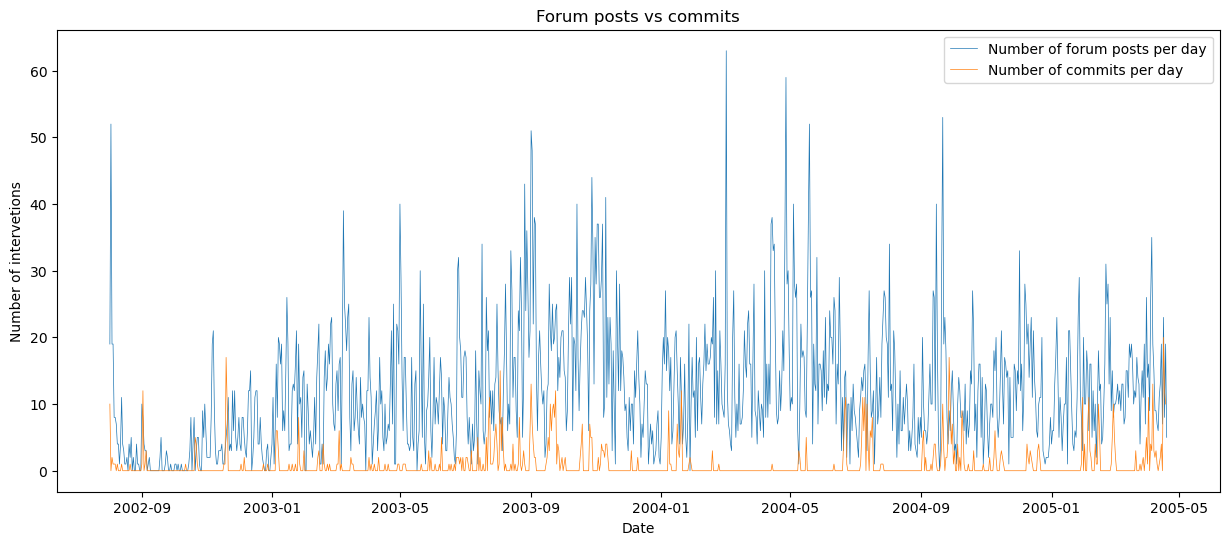

In [178]:
# Plot the daily counts
plt.figure(figsize=(15,6))
plt.plot(daily_counts, label='Number of forum posts per day', linewidth=0.5)
plt.plot(git_daily_counts, label='Number of commits per day', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Number of intervetions')
plt.title('Forum posts vs commits')
plt.legend()
plt.show()

In [160]:
# todo
## Linear regression number of posts per day
## Check who are the forum posters and put people together from the github + others
## Find the things that go together
## forum – how to 